In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Define transformations for the train set
train_transformations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True,transform=train_transformations)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

Files already downloaded and verified


In [0]:
# Define transformations for the test set
test_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True,transform=test_transformations)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#converting into an iterable object
trainiter = iter(trainloader)
testiter = iter(testloader)

<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])
torch.Size([64])
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


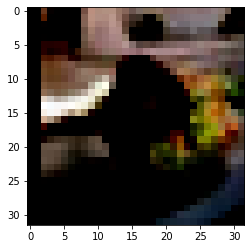

In [0]:
#Analyzing one sample and display one particular image
image, label = trainiter.next()
print(type(image))
print(image.size())
print(label.size())

img = image[0,:].numpy();
img=np.transpose(img,(1,2,0))
l=label[0].numpy()
print(l)
plt.imshow(img)

In [0]:
class Unit(nn.Module):
    def __init__(self,in_channels,out_channels):
        super(Unit,self).__init__()
        

        self.conv = nn.Conv2d(in_channels=in_channels,kernel_size=3,out_channels=out_channels,stride=1,padding=1)
        nn.init.xavier_uniform(self.conv.weight)
        self.bn = nn.BatchNorm2d(num_features=out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self,input):
        output = self.conv(input)
        output = self.bn(output)
        output = self.relu(output)

        return output

In [0]:
class Model1(nn.Module):
    def __init__(self,num_classes=100):
        super(Model1,self).__init__()

        self.unit1 = Unit(in_channels=3,out_channels=64)
        self.unit2 = Unit(in_channels=64,out_channels=64)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit3 = Unit(in_channels=64,out_channels=128)
        self.unit4 = Unit(in_channels=128,out_channels=128)
        
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit5 = Unit(in_channels=128,out_channels=256)
        self.unit6 = Unit(in_channels=256,out_channels=256)
        
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit7 = Unit(in_channels=256,out_channels=512)
        self.unit8 = Unit(in_channels=512,out_channels=512)
        
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.unit9 = Unit(in_channels=512,out_channels=512)
        self.unit10 = Unit(in_channels=512,out_channels=512)
        
        self.pool5 = nn.MaxPool2d(kernel_size=2)


        self.net = nn.Sequential(
            self.unit1,
            self.unit2,
            self.pool1,
            self.unit3,
            self.unit4,
            self.pool2,
            self.unit5,
            self.unit6,
            self.pool3,
            self.unit7,
            self.unit8,
            self.pool4,
            self.unit9,
            self.unit10,
            self.pool5,
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, input):
        output = self.net(input)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
        return output

In [0]:
class Model2(nn.Module):
    def __init__(self,num_classes=100):
        super(Model2,self).__init__()

        self.unit1 = Unit(in_channels=3,out_channels=64)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit2 = Unit(in_channels=64,out_channels=128)
        
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit3 = Unit(in_channels=128,out_channels=256)
        self.unit4 = Unit(in_channels=256,out_channels=256)
        
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit5 = Unit(in_channels=256,out_channels=512)
        self.unit6 = Unit(in_channels=512,out_channels=512)
        
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.unit7 = Unit(in_channels=512,out_channels=512)
        self.unit8 = Unit(in_channels=512,out_channels=512)
        
        self.pool5 = nn.MaxPool2d(kernel_size=2)


        self.net = nn.Sequential(
            self.unit1,
            self.pool1,
            self.unit2,
            self.pool2,
            self.unit3,
            self.unit4,
            self.pool3,
            self.unit5,
            self.unit6,
            self.pool4,
            self.unit7,
            self.unit8,
            self.pool5,
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, input):
        output = self.net(input)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
        return output

In [0]:
class Model3(nn.Module):
    def __init__(self,num_classes=100):
        super(Model3,self).__init__()

        self.unit1 = Unit(in_channels=3,out_channels=64)
        
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit2 = Unit(in_channels=64,out_channels=128)
        
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit3 = Unit(in_channels=128,out_channels=256)
        
        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit4 = Unit(in_channels=256,out_channels=512)
        
        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.unit5 = Unit(in_channels=512,out_channels=512)
        
        self.pool5 = nn.MaxPool2d(kernel_size=2)


        self.net = nn.Sequential(
            self.unit1,
            self.pool1,
            self.unit2,
            self.pool2,
            self.unit3,
            self.pool3,
            self.unit4,
            self.pool4,
            self.unit5,
            self.pool5,
        )

        self.classifier = nn.Sequential(
            nn.Linear(512, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, input):
        output = self.net(input)
        output = output.view(output.size()[0], -1)
        output = self.classifier(output)
        return output

In [0]:
def adjust_learning_rate(optimizer, epoch):
    lr = 0.001

    if epoch > 180:
        lr = lr / 1000000
    elif epoch > 150:
        lr = lr / 100000
    elif epoch > 120:
        lr = lr / 10000
    elif epoch > 90:
        lr = lr / 1000
    elif epoch > 60:
        lr = lr / 100
    elif epoch > 30:
        lr = lr / 10

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

def correct(groundTruth,output):
  assert groundTruth.size(0) == output.size(0)
  _, indices = torch.max(output, 1)
  ch=torch.eq(groundTruth,indices)
  return torch.sum(ch).item()
  
def train(net, nepochs, criterion, optimizer, batchSize, adjust_lr=True):   
  trainAcc=[];testAcc=[];
  trainLoss=[];testLoss=[];

  totalTrainSamples=len(trainloader.dataset)
  print("Total training samples :", totalTrainSamples)
  totalTestSamples=len(testloader.dataset);
  print("Total testing samples :", totalTestSamples)

  for epoch in range(nepochs):

      #TRAINING
      running_loss_train = 0.0
      numCorr_train=0;
      net.train()
      
      for i, data in enumerate(trainloader, 0):  
          inputs, labels = data[0].to(device), data[1].to(device)
          optimizer.zero_grad()
          outputs = net(inputs)
          numCorr_train+=correct(labels,outputs)      
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss_train += loss.item()
                
      trainAcc.append((numCorr_train/totalTrainSamples)*100)
      trainLoss.append(running_loss_train/totalTrainSamples)

      if adjust_lr:
        adjust_learning_rate(optimizer=optimizer, epoch=epoch)
      
      #TESTING
      net.eval()
      running_loss_test = 0.0
      numCorr_test=0;
      for i, data in enumerate(testloader, 0):
          inputs, labels = data[0].to(device), data[1].to(device)
          outputs = net(inputs)
          numCorr_test+=correct(labels,outputs)
          loss = criterion(outputs, labels)      
          running_loss_test += loss.item()
      
      testAcc.append((numCorr_test/totalTestSamples)*100)
      testLoss.append(running_loss_test/totalTestSamples)

      print("Epoch: {} | Train Loss: {} | Train Accuracy: {}% | Test Loss: {} | Test Accuracy: {}%".format(epoch, running_loss_train/totalTrainSamples, round((numCorr_train/totalTrainSamples)*100,2), running_loss_test/totalTestSamples, round((numCorr_test/totalTestSamples)*100,2)))
      if epoch % 20 == 0:
        torch.save(net.state_dict(), 'checkpoint_{}.pth'.format(epoch))

  return net, trainAcc, testAcc, trainLoss, testLoss

In [0]:
# print("Model{} with {} initialization {} and {} Loss".format(1, 'Uniform Xavier', 'Adaptive Learning Rate', 'Cross Entropy'))
# net_adapt_lr = Model1(100)
# net_adapt_lr.to(device)
# criterion = nn.CrossEntropyLoss()
# momentum=0.09
# nepochs=100
# optimizer=optim.Adam(net_adapt_lr.parameters(), lr=0.001, weight_decay=0.0001)
# batchSize=128

# net_adapt_lr, trainAcc_adapt_lr, testAcc_adapt_lr, trainLoss_adapt_lr, testLoss_adapt_lr = train(net=net_adapt_lr, nepochs=nepochs, criterion=criterion, optimizer=optimizer, batchSize=batchSize)

In [0]:
print("Model{} with {} initialization {} and {} Loss".format(1, 'Uniform Xavier', 'Fixed Learning Rate', 'Multi Margin'))
net_fixed_lr = Model1(100)
net_fixed_lr.to(device)
criterion = nn.MultiMarginLoss()
momentum=0.09
nepochs=100
optimizer=optim.Adam(net_fixed_lr.parameters(), lr=0.001, weight_decay=0.0001)
batchSize=128

net_fixed_lr, trainAcc_fixed_lr, testAcc_fixed_lr, trainLoss_fixed_lr, testLoss_fixed_lr = train(net=net_fixed_lr, nepochs=nepochs, criterion=criterion, optimizer=optimizer, batchSize=batchSize, adjust_lr=False)

Model1 with Uniform Xavier initialization Fixed Learning Rate and Multi Margin Loss


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  import sys


Total training samples : 50000
Total testing samples : 10000
Epoch: 0 | Train Loss: 0.012000900542140007 | Train Accuracy: 2.36% | Test Loss: 0.009423403713107108 | Test Accuracy: 3.83%
Epoch: 1 | Train Loss: 0.009169542056918145 | Train Accuracy: 4.21% | Test Loss: 0.008241811931133271 | Test Accuracy: 5.0%
Epoch: 2 | Train Loss: 0.007876887092590332 | Train Accuracy: 5.57% | Test Loss: 0.006743191710114479 | Test Accuracy: 7.98%
Epoch: 3 | Train Loss: 0.00705838042974472 | Train Accuracy: 6.64% | Test Loss: 0.007644688284397125 | Test Accuracy: 6.0%
Epoch: 4 | Train Loss: 0.006310077899694443 | Train Accuracy: 7.98% | Test Loss: 0.007730018502473832 | Test Accuracy: 6.63%
Epoch: 5 | Train Loss: 0.005714187316596508 | Train Accuracy: 9.56% | Test Loss: 0.005530760341882705 | Test Accuracy: 10.15%
Epoch: 6 | Train Loss: 0.005147456566095352 | Train Accuracy: 11.13% | Test Loss: 0.005484460327029228 | Test Accuracy: 12.1%
Epoch: 7 | Train Loss: 0.004624591946005821 | Train Accuracy: 12.

In [0]:
print("Model{} with {} initialization {} and {} Loss {} Batch Normalisation".format(1, 'Uniform Xavier', 'Adaptive Learning Rate', 'Cross Entropy', 'No'))
net_model3 = Model3(100)
net_model3.to(device)
criterion = nn.CrossEntropyLoss()
momentum=0.09
nepochs=100
optimizer=optim.Adam(net_model3.parameters(), lr=0.001, weight_decay=0.0001)
batchSize=128

net_model3, trainAcc_model3, testAcc_model3, trainLoss_model3, testLoss_model3 = train(net=net_model3, nepochs=nepochs, criterion=criterion, optimizer=optimizer, batchSize=batchSize)

Model1 with Uniform Xavier initialization Adaptive Learning Rate and Cross Entropy Loss No Batch Normalisation
Total training samples : 50000
Total testing samples : 10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  import sys


Epoch: 0 | Train Loss: 0.06520427247524262 | Train Accuracy: 4.58% | Test Loss: 0.060508887672424315 | Test Accuracy: 7.86%
Epoch: 1 | Train Loss: 0.059093622756004334 | Train Accuracy: 9.58% | Test Loss: 0.055263741612434386 | Test Accuracy: 14.1%
Epoch: 2 | Train Loss: 0.05405925314426422 | Train Accuracy: 14.42% | Test Loss: 0.05027979452610016 | Test Accuracy: 19.07%
Epoch: 3 | Train Loss: 0.04979704577445984 | Train Accuracy: 19.62% | Test Loss: 0.04419946818351746 | Test Accuracy: 26.62%
Epoch: 4 | Train Loss: 0.04581677182197571 | Train Accuracy: 24.7% | Test Loss: 0.04088574624061585 | Test Accuracy: 31.25%
Epoch: 5 | Train Loss: 0.04273128755569458 | Train Accuracy: 28.84% | Test Loss: 0.03948381696939468 | Test Accuracy: 33.37%
Epoch: 6 | Train Loss: 0.039980257074832916 | Train Accuracy: 32.46% | Test Loss: 0.03586384280920029 | Test Accuracy: 38.84%
Epoch: 7 | Train Loss: 0.03773464636802673 | Train Accuracy: 35.64% | Test Loss: 0.03330183697938919 | Test Accuracy: 42.4%
Ep

In [0]:
print(trainAcc_model3)

[4.58, 9.576, 14.418000000000001, 19.624, 24.698, 28.843999999999998, 32.458, 35.642, 38.653999999999996, 41.471999999999994, 43.952000000000005, 45.684000000000005, 47.86, 49.309999999999995, 51.202000000000005, 52.01, 53.038, 54.594, 55.418, 56.63399999999999, 57.42, 58.652, 58.824, 59.94199999999999, 60.540000000000006, 61.565999999999995, 62.053999999999995, 62.256, 63.156, 63.517999999999994, 63.974, 64.61200000000001, 70.304, 73.014, 73.98599999999999, 74.9, 75.63, 76.36800000000001, 76.52600000000001, 77.10000000000001, 77.62599999999999, 78.014, 78.432, 78.664, 79.292, 79.392, 80.202, 80.17999999999999, 80.404, 80.84400000000001, 81.112, 81.49, 81.672, 82.188, 82.468, 82.648, 82.89800000000001, 83.0, 83.07, 83.61, 83.916, 84.234, 85.152, 85.366, 85.304, 85.368, 85.54, 85.68, 85.54, 85.792, 85.52, 85.956, 85.996, 85.924, 86.252, 86.232, 86.274, 86.166, 86.37599999999999, 86.09400000000001, 86.312, 86.414, 86.512, 86.438, 86.592, 86.646, 86.6, 86.572, 86.61999999999999, 86.664, 8

F1: [1.         1.         1.         0.         1.         0.66666667
 0.         0.         0.         1.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         0.         1.         0.66666667 0.         1.
 0.         1.         0.66666667 0.8        1.         1.
 0.         0.8        1.         1.         1.         0.
 1.         1.         0.66666667 0.         1.         1.
 0.         1.         0.8        0.8        0.         0.
 0.         1.         0.         1.         0.         1.
 0.66666667 0.         0.         1.        ]
Precision: [1.         1.         1.         0.         1.         0.5
 0.         0.         0.         1.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         0.         1.         0.5        0.         1.
 0.         1.         0.5        0.66666667 1.         1.
 0.         1.         1.         1.         1.         0.
 1.         1.         1.         0.         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


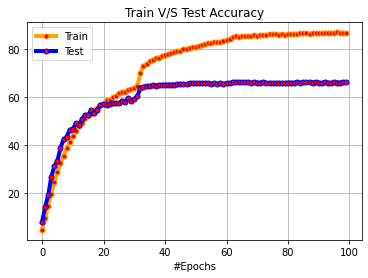

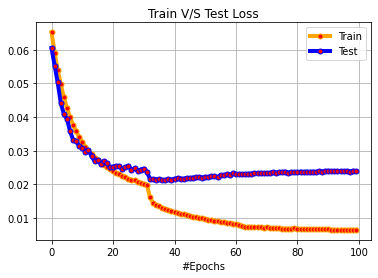

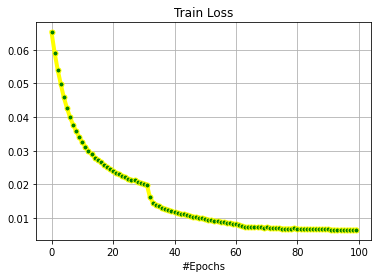

In [34]:
import matplotlib.pyplot as plt

fig1, ax1=  plt.subplots()
plt.grid()
ax1.plot(trainAcc_model3,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4)
ax1.plot(testAcc_model3,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4)
plt.gca().legend(('Train','Test'))
ax1.set_title("Train V/S Test Accuracy")
ax1.set_xlabel("#Epochs")

fig2, ax2=  plt.subplots()
plt.grid()
ax2.plot(trainLoss_model3,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4,label="Train Loss")
ax2.plot(testLoss_model3,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4,label="Test Loss")
plt.gca().legend(('Train','Test'))
ax2.set_title("Train V/S Test Loss")
ax2.set_xlabel("#Epochs")

fig3, ax3=  plt.subplots()
plt.grid()
ax3.plot(trainLoss_model3,marker='o', markerfacecolor='green', markersize=5, color='yellow', linewidth=4,label="Train Loss")
ax3.set_title("Train Loss")
ax3.set_xlabel("#Epochs")

from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score, recall_score

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        images = images.cpu()
        labels = labels.cpu()
        predicted = predicted.cpu()
        print('F1: {}'.format(f1_score(labels, predicted, average=None)))
        print('Precision: {}'.format(precision_score(labels, predicted,average=None)))
        print('Recall: {}'.format(recall_score(labels, predicted,average=None)))
        break

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

F1: [1.         1.         1.         0.         1.         0.66666667
 0.         0.         0.         1.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         0.         1.         0.66666667 0.         1.
 0.         1.         0.66666667 0.8        1.         1.
 0.         0.8        1.         1.         1.         0.
 1.         1.         0.66666667 0.         1.         1.
 0.         1.         0.8        0.8        0.         0.
 0.         1.         0.         1.         0.         1.
 0.66666667 0.         0.         1.        ]
Precision: [1.         1.         1.         0.         1.         0.5
 0.         0.         0.         1.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         0.         1.         0.5        0.         1.
 0.         1.         0.5        0.66666667 1.         1.
 0.         1.         1.         1.         1.         0.
 1.         1.         1.         0.         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


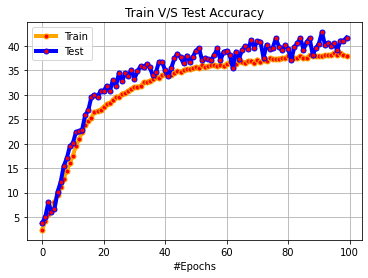

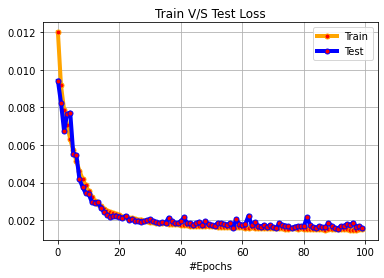

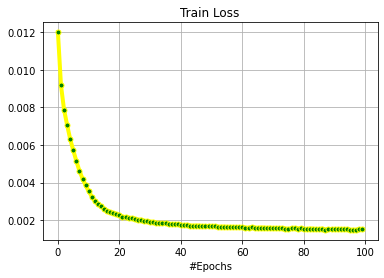

In [35]:
import matplotlib.pyplot as plt

fig1, ax1=  plt.subplots()
plt.grid()
ax1.plot(trainAcc_fixed_lr,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4)
ax1.plot(testAcc_fixed_lr,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4)
plt.gca().legend(('Train','Test'))
ax1.set_title("Train V/S Test Accuracy")
ax1.set_xlabel("#Epochs")

fig2, ax2=  plt.subplots()
plt.grid()
ax2.plot(trainLoss_fixed_lr,marker='o', markerfacecolor='red', markersize=5, color='orange', linewidth=4,label="Train Loss")
ax2.plot(testLoss_fixed_lr,marker='o', markerfacecolor='red', markersize=5, color='blue', linewidth=4,label="Test Loss")
plt.gca().legend(('Train','Test'))
ax2.set_title("Train V/S Test Loss")
ax2.set_xlabel("#Epochs")

fig3, ax3=  plt.subplots()
plt.grid()
ax3.plot(trainLoss_fixed_lr,marker='o', markerfacecolor='green', markersize=5, color='yellow', linewidth=4,label="Train Loss")
ax3.set_title("Train Loss")
ax3.set_xlabel("#Epochs")

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net_model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        images = images.cpu()
        labels = labels.cpu()
        predicted = predicted.cpu()
        print('F1: {}'.format(f1_score(labels, predicted, average=None)))
        print('Precision: {}'.format(precision_score(labels, predicted,average=None)))
        print('Recall: {}'.format(recall_score(labels, predicted,average=None)))
        break

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [0]:
# upload external file before import
from google.colab import files

torch.save(net.state_dict(), 'checkpoint.pth')

# download checkpoint file
files.download('checkpoint.pth')
